In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.


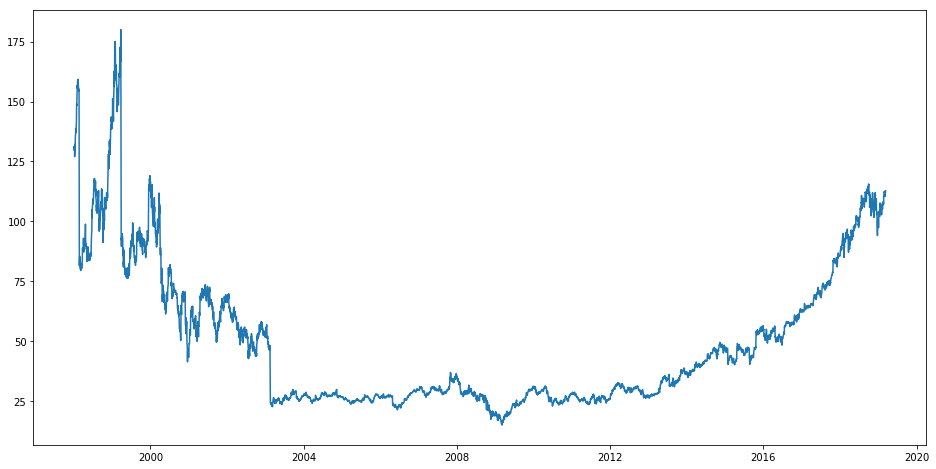

In [119]:
#reading the data
dataset = pd.read_csv('dailyMSFT.csv'); 
#Converting the datetime string to a datetime value
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d')
#setting the index of the dataframe as the timestamp
dataset.index = dataset['timestamp']

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['close'], label='Close Price history')

In [120]:
#sorting by date
data = dataset.sort_index(ascending=True, axis=0)
#removing other traits except timestamp and close
new_data = pd.DataFrame(index=range(0,len(dataset)),columns=['timestamp', 'close'])
#copying timestamp and price in the new dataframe
for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['close'][i] = data['close'][i]


In [121]:
#Setting timestamp as the new index
new_data.index = new_data.timestamp
#Dropping timestamp as a column so it wouldn't show as a value
new_data.drop('timestamp', axis=1, inplace=True)

#Finally building our dataset
dataset = new_data.values


In [122]:
dataset.shape

(5330, 1)

In [123]:
#First 4800 values to be used for training
train = dataset[:4800,:]
#Last to be used for testing
valid = dataset[4800:,:]

In [125]:
#Scaling the data
scaled_data = scaler.fit_transform(dataset)

D:\Programming\Anaconda\envs\pulamea\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [124]:
#This breaks down the train data into units of 60 price points that will be used to predict the 61th point
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#Magical reshaping so it fits into the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [19]:
#Building the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

In [20]:
#Training the model
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 242s - loss: 9.3454e-04


In [126]:
#We take the validation set(len(new_data)-len(valid)) minus 60 points so that we can predict using the validation set
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
#Scale the inputs
inputs  = scaler.transform(inputs)

In [127]:
#Putting the inputs data into the required shape(530 predictions using 60 past data points)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test.shape


(530, 60)

In [128]:
#Doing weird stuff to the shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model2.predict(X_test)
#Getting real prices
closing_price = scaler.inverse_transform(closing_price)

In [129]:
#Calculating the accuracy score
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

1.717981710061404

D:\Programming\Anaconda\envs\pulamea\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


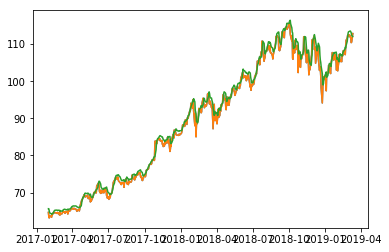

In [130]:
train = new_data[4800:]
valid = new_data[4800:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [26]:
#TODO:test the same model on another stock, test another stock on it's own model, improve the current model.

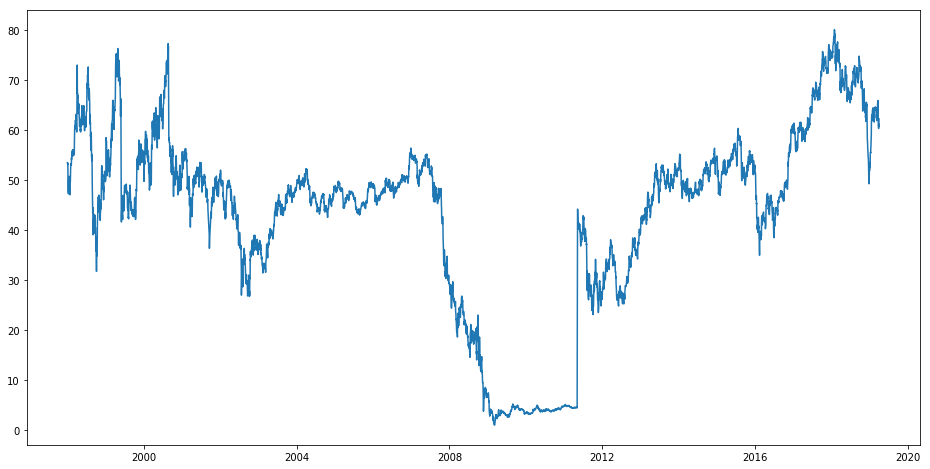

In [99]:
#reading the data
dataset = pd.read_csv('dailyC.csv');
#Converting the datetime string to a datetime value
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d')
#setting the index of the dataframe as the timestamp
dataset.index = dataset['timestamp']

#plot
plt.figure(figsize=(16,8))
plt.plot(dataset['close'], label='Close Price history')

In [100]:
#sorting by date
data = dataset.sort_index(ascending=True, axis=0)
#removing other traits except timestamp and close
new_data = pd.DataFrame(index=range(0,len(dataset)),columns=['timestamp', 'close'])
#copying timestamp and price in the new dataframe
for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['close'][i] = data['close'][i]
#Setting timestamp as the new index
new_data.index = new_data.timestamp
#Dropping timestamp as a column so it wouldn't show as a value
new_data.drop('timestamp', axis=1, inplace=True)

#Finally building our dataset
dataset = new_data.values

#First 4800 values to be used for training
train = dataset[:4800,:]
#Last to be used for testing
valid = dataset[4800:,:]

#Scaling the data
scaled_data = scaler.fit_transform(dataset)
#This breaks down the train data into units of 60 price points that will be used to predict the 61th point
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#Magical reshaping so it fits into the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

D:\Programming\Anaconda\envs\pulamea\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


D:\Programming\Anaconda\envs\pulamea\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


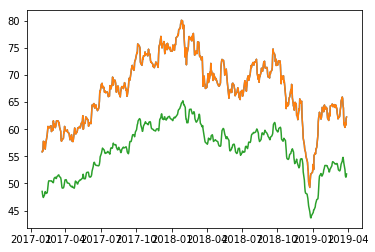

In [101]:
#We take the validation set(len(new_data)-len(valid)) minus 60 points so that we can predict using the validation set
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
#Scale the inputs
inputs  = scaler.transform(inputs)
#Putting the inputs data into the required shape(530 predictions using 60 past data points)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#Doing weird stuff to the shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = modelt.predict(X_test)
#Getting real prices
closing_price = scaler.inverse_transform(closing_price)
#Calculating the accuracy score
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms
train = new_data[4800:]
valid = new_data[4800:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [102]:
rms

11.335122309852537

### Apparently, we cannot(???????????????) use the same model for different stocks

In [96]:
#reading the data
dataset = pd.read_csv('dailyMSFT.csv');
#Converting the datetime string to a datetime value
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'],format='%Y-%m-%d')
#setting the index of the dataframe as the timestamp
dataset.index = dataset['timestamp']
#sorting by date
data = dataset.sort_index(ascending=True, axis=0)
#removing other traits except timestamp and close
new_data = pd.DataFrame(index=range(0,len(dataset)),columns=['timestamp', 'close'])
#copying timestamp and price in the new dataframe
for i in range(0,len(data)):
    new_data['timestamp'][i] = data['timestamp'][i]
    new_data['close'][i] = data['close'][i]
#Setting timestamp as the new index
new_data.index = new_data.timestamp
#Dropping timestamp as a column so it wouldn't show as a value
new_data.drop('timestamp', axis=1, inplace=True)

#Finally building our dataset
dataset = new_data.values

#First 4800 values to be used for training
train = dataset
#Last to be used for testing
valid = dataset[4800:,:]

#Scaling the data
scaled_data = scaler.fit_transform(dataset)
#This breaks down the train data into units of 60 price points that will be used to predict the 61th point
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)
#Magical reshaping so it fits into the model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

D:\Programming\Anaconda\envs\pulamea\lib\site-packages\sklearn\utils\validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [91]:
#Building the model
modelt = Sequential()
modelt.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
modelt.add(LSTM(units=50))
modelt.add(Dense(1))

In [92]:
#Training the model
modelt.compile(loss='mean_squared_error', optimizer='adam')
modelt.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 291s - loss: 9.2296e-04


D:\Programming\Anaconda\envs\pulamea\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


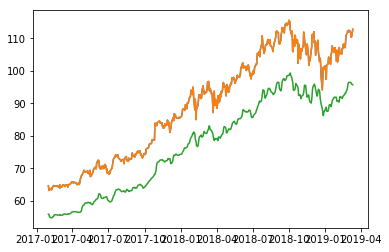

In [97]:
#We take the validation set(len(new_data)-len(valid)) minus 60 points so that we can predict using the validation set
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
#Scale the inputs
inputs  = scaler.transform(inputs)
#Putting the inputs data into the required shape(530 predictions using 60 past data points)
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
#Doing weird stuff to the shape
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = modelt.predict(X_test)
#Getting real prices
closing_price = scaler.inverse_transform(closing_price)
#Calculating the accuracy score
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms
train = new_data[4800:]
valid = new_data[4800:]
valid['Predictions'] = closing_price
plt.plot(train['close'])
plt.plot(valid[['close','Predictions']])

In [98]:
rms

12.373021362313098

#### TODO: Improve model

+ Apparently, using more data points for generating a prediction (from 60 to 100) yields a worse model.
+ Also using all data points has a negative result

In [115]:
#SAVING Our FIRST MODEL
model.save('stockify.h5')

In [116]:
from keras.models import load_model
model2 = load_model('stockify.h5')